In [2]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

USE_CUDA = torch.cuda.is_available() #gpu 를 사용하능하면 true
device = torch.device("cuda" if USE_CUDA else "cpu")
print("다음 기기를 학습힙니다:",  device)

#fix random seed
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

#hyperparameter
training_epochs = 15
batch_size = 100

다음 기기를 학습힙니다: cuda


In [3]:
#MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(), # 현재 데이터를 pytorch tensor로 변환
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                          train=False,
                          transform=transforms.ToTensor(),
                          download=True)
#dataset loader
data_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size,
                         shuffle=True,
                         drop_last=True)

2.3%

100.1%

Extracting MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to MNIST_data/MNIST\raw


0.0%5%

Extracting MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw


180.4%C:\anaconda3\envs\pytorch04\lib\site-packages\torchvision\datasets\mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST_data/MNIST\raw
Extracting MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw
Processing...
Done!


In [4]:
#design model
# input_dim=784, output_dim=10
linear = nn.Linear(784, 10, bias = True).to(device)

#optimizer, cost
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 소프트맥스 함수를 포함하고 있음.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [5]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        #배치 크기가 100, 아래의 연산에서 X.shape(100,784)가 된다.
        X = X.view(-1, 28*28).to(device)

        #레이블은 one-hot encoding이 되지 않은 상태 0~9 정수
        Y= Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch
    print('epoch {:04d} cost={:.9f}'.format(epoch+1, avg_cost))
print('learning finished')





epoch 0001 cost=0.534912467
epoch 0002 cost=0.359308630
epoch 0003 cost=0.331088185
epoch 0004 cost=0.316574186
epoch 0005 cost=0.307130307
epoch 0006 cost=0.300207853
epoch 0007 cost=0.294897288
epoch 0008 cost=0.290830433
epoch 0009 cost=0.287419587
epoch 0010 cost=0.284589112
epoch 0011 cost=0.281816185
epoch 0012 cost=0.279919654
epoch 0013 cost=0.277836859
epoch 0014 cost=0.276022345
epoch 0015 cost=0.274443209
learning finished


tensor([7, 2, 1,  ..., 4, 8, 6], device='cuda:0')
tensor([ True,  True,  True,  ...,  True, False,  True], device='cuda:0')
Accuracy: 0.8867999911308289
Label 5
Prediction:  5


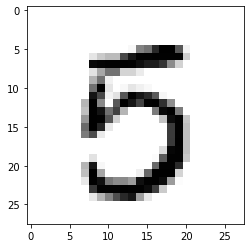

In [16]:
#테스트 데이터를 사용하여 모델을 테스트한다

with torch.no_grad(): #torch.no_grad()는 gradient 계산를 수행하지 않는다.
    X_test = mnist_test.test_data.view(-1,28*28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction,1 ) == Y_test
    print(torch.argmax(prediction,1 ))
    print(correct_prediction)
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    #MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
    r = random.randint(0, len(mnist_test)- 1)
    X_single_data = mnist_test.test_data[r:r+1].view(-1,28*28).float().to(device)
    Y_singel_data = mnist_test.test_labels[r:r+1].to(device)

    print('Label', Y_singel_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r+1].view(28,28), cmap='Greys',interpolation='nearest')
    plt.show()
